In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
import time
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("/Users/daniiltekunov/Desktop/train.csv")

data['medv'] = np.where(data['medv'].between(0, 9), 0, data['medv'])

data['medv'] = np.where(data['medv'].between(9, 13.5), 1, data['medv'])

data['medv'] = np.where(data['medv'].between(13.5, 15), 2, data['medv'])

data['medv'] = np.where(data['medv'].between(15, 17), 3, data['medv'])

data['medv'] = np.where(data['medv'].between(17, 23), 4, data['medv'])

data['medv'] = np.where(data['medv'].between(23, 25), 5, data['medv'])

data['medv'] = np.where(data['medv'].between(25, 30), 6, data['medv'])

data['medv'] = np.where(data['medv'].between(30, 33), 7, data['medv'])

data['medv'] = np.where(data['medv'].between(33, 45), 8, data['medv'])

data['medv'] = np.where(data['medv'].between(45, 60), 9, data['medv'])

print(data[0:5])

y = data.medv


X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)
print("__________")
print(y[0:5])
print("__________")
print(X[0:5])

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98   5.0  
1     17.8  396.90   9.14   4.0  
2     18.7  394.63   2.94   8.0  
3     18.7  396.90   5.33   8.0  
4     15.2  395.60  12.43   4.0  
__________
0    5.0
1    4.0
2    8.0
3    8.0
4    4.0
Name: medv, dtype: float64
__________
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237 

Now, let's split the sample via 8:2:

In [3]:
# Saving seed 
divide_seed = np.random.randint(1, 100)

# And then split the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

# And check if they splitted correctly
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

266
67
266
67


Also, we need to normallize and scale the data, so we'll use Scaler:

In [4]:
scaler = StandardScaler()

# We normalize train sample
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# And test sample
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Let's start with a linear regression all over the model:


In [9]:
lr = LinearRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_test)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

print(classification_report(prediction_lr.round(), y_test))

Test result: 0.7288773448597603


Train result: 0.749279570842966
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.00      0.00      0.00         2
        2.0       0.00      0.00      0.00         8
        3.0       0.50      0.07      0.12        14
        4.0       0.32      0.78      0.45         9
        5.0       0.44      0.29      0.35        14
        6.0       0.33      0.25      0.29         8
        7.0       0.80      0.44      0.57         9
        8.0       0.60      1.00      0.75         3

avg / total       0.41      0.31      0.30        67



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Now, let's try to improve the quality by using KNN:

In [10]:
list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()
list_of_f_knn = list()

for i in range(2, 100):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_train)
    list_of_predictions_knn.append(knn_predict)
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    #list_of_train_results_knn.append(knn.score(X_train, y_train))
    #list_of_f_knn.append(f1_score(y_train, knn_predict))
    print("Predicted with ", i, " neighbours")

Predicted with  2  neighbours
Predicted with  3  neighbours
Predicted with  4  neighbours
Predicted with  5  neighbours
Predicted with  6  neighbours
Predicted with  7  neighbours
Predicted with  8  neighbours
Predicted with  9  neighbours
Predicted with  10  neighbours
Predicted with  11  neighbours
Predicted with  12  neighbours
Predicted with  13  neighbours
Predicted with  14  neighbours
Predicted with  15  neighbours
Predicted with  16  neighbours
Predicted with  17  neighbours
Predicted with  18  neighbours
Predicted with  19  neighbours
Predicted with  20  neighbours
Predicted with  21  neighbours
Predicted with  22  neighbours
Predicted with  23  neighbours
Predicted with  24  neighbours
Predicted with  25  neighbours
Predicted with  26  neighbours
Predicted with  27  neighbours


Predicted with  28  neighbours
Predicted with  29  neighbours
Predicted with  30  neighbours
Predicted with  31  neighbours
Predicted with  32  neighbours
Predicted with  33  neighbours
Predicted with  34  neighbours
Predicted with  35  neighbours
Predicted with  36  neighbours
Predicted with  37  neighbours
Predicted with  38  neighbours
Predicted with  39  neighbours
Predicted with  40  neighbours
Predicted with  41  neighbours
Predicted with  42  neighbours
Predicted with  43  neighbours
Predicted with  44  neighbours
Predicted with  45  neighbours
Predicted with  46  neighbours
Predicted with  47  neighbours
Predicted with  48  neighbours
Predicted with  49  neighbours
Predicted with  50  neighbours
Predicted with  51  neighbours
Predicted with  52  neighbours
Predicted with  53  neighbours
Predicted with  54  neighbours
Predicted with  55  neighbours
Predicted with  56  neighbours


Predicted with  57  neighbours
Predicted with  58  neighbours
Predicted with  59  neighbours
Predicted with  60  neighbours
Predicted with  61  neighbours
Predicted with  62  neighbours
Predicted with  63  neighbours
Predicted with  64  neighbours
Predicted with  65  neighbours
Predicted with  66  neighbours
Predicted with  67  neighbours
Predicted with  68  neighbours
Predicted with  69  neighbours
Predicted with  70  neighbours
Predicted with  71  neighbours
Predicted with  72  neighbours
Predicted with  73  neighbours
Predicted with  74  neighbours
Predicted with  75  neighbours
Predicted with  76  neighbours
Predicted with  77  neighbours
Predicted with  78  neighbours


Predicted with  79  neighbours
Predicted with  80  neighbours
Predicted with  81  neighbours
Predicted with  82  neighbours
Predicted with  83  neighbours
Predicted with  84  neighbours
Predicted with  85  neighbours
Predicted with  86  neighbours
Predicted with  87  neighbours
Predicted with  88  neighbours
Predicted with  89  neighbours
Predicted with  90  neighbours
Predicted with  91  neighbours
Predicted with  92  neighbours
Predicted with  93  neighbours
Predicted with  94  neighbours
Predicted with  95  neighbours
Predicted with  96  neighbours
Predicted with  97  neighbours


Predicted with  98  neighbours
Predicted with  99  neighbours


Max test result:  0.4925373134328358  takes  3  neighbors
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.56      0.45      0.50        11
        2.0       0.00      0.00      0.00         0
        3.0       0.00      0.00      0.00         1
        4.0       0.86      0.51      0.64        37
        5.0       0.22      0.20      0.21        10
        6.0       0.00      0.00      0.00         0
        7.0       0.20      1.00      0.33         1
        8.0       1.00      0.71      0.83         7

avg / total       0.71      0.48      0.56        67



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


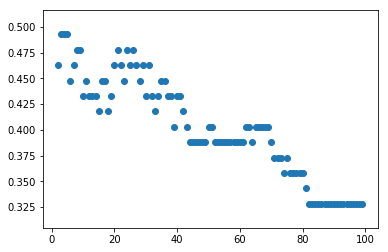

In [11]:
print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+2), " neighbors")

plt.scatter(x=list((range(2, 100))), y=list_of_test_results_knn)

knn = KNeighborsClassifier(n_neighbors=21, weights = 'distance')
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
list_of_predictions_knn.append(knn_predict)
list_of_test_results_knn.append(knn.score(X_test, y_test))

print(classification_report(knn_predict.round(), y_test))

Now, let's try to use Logistic regression:

In [82]:
logistic_model = LogisticRegression(solver="newton-cg", multi_class="multinomial")

logistic_model.fit(X_train, y_train)

prediction = logistic_model.predict(X_test)

print("Train result:", logistic_model.score(X_train, y_train))

print("Accuracy:", accuracy_score(y_test, prediction))

print(classification_report(prediction.round(), y_test))

Train result: 0.6390977443609023
Accuracy: 0.43283582089552236
             precision    recall  f1-score   support

        0.0       0.25      1.00      0.40         1
        1.0       0.38      0.60      0.46         5
        2.0       0.00      0.00      0.00         5
        3.0       0.00      0.00      0.00         1
        4.0       0.86      0.54      0.67        35
        5.0       0.20      0.11      0.14         9
        6.0       0.20      0.50      0.29         2
        7.0       0.25      0.50      0.33         2
        8.0       0.33      0.40      0.36         5
        9.0       0.20      0.50      0.29         2

avg / total       0.55      0.43      0.46        67



Now Decision Tree:

In [83]:
decision_tree = DecisionTreeClassifier(random_state=3)

decision_tree.fit(X_train, y_train)

prediction_tree = decision_tree.predict(X_test)

print("Test result (accuracy):", decision_tree.score(X_test, y_test))

print("Accuracy:", accuracy_score(y_test, prediction_tree))

print(classification_report(prediction_tree.round(), y_test))

Test result (accuracy): 0.3582089552238806
Accuracy: 0.3582089552238806
             precision    recall  f1-score   support

        0.0       0.25      1.00      0.40         1
        1.0       0.25      0.40      0.31         5
        2.0       0.50      0.14      0.22         7
        3.0       0.00      0.00      0.00         1
        4.0       0.59      0.54      0.57        24
        5.0       0.20      0.07      0.10        15
        6.0       0.00      0.00      0.00         5
        7.0       0.25      0.50      0.33         2
        8.0       0.67      0.67      0.67         6
        9.0       0.20      1.00      0.33         1

avg / total       0.40      0.36      0.35        67



Now let's look at this in RandomForest:

In [51]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
forest_f_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(10, 1000, 10):
    
    decision_forest = RandomForestClassifier(random_state=3, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=3, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
Took  0.5947229862213135  seconds
--------------------


Number of trees: 150
Prediction completed by 15.0 %
Took  3.0614309310913086  seconds
--------------------


Number of trees: 250
Prediction completed by 25.0 %
Took  7.164557933807373  seconds
--------------------


Number of trees: 350
Prediction completed by 35.0 %
Took  12.967283725738525  seconds
--------------------


Number of trees: 450
Prediction completed by 45.0 %
Took  22.07860779762268  seconds
--------------------


Number of trees: 550
Prediction completed by 55.0 %
Took  31.73835802078247  seconds
--------------------


Number of trees: 650
Prediction completed by 65.0 %
Took  42.61555099487305  seconds
--------------------


Number of trees: 750
Prediction completed by 75.0 %
Took  56.10689616203308  seconds
--------------------


Number of trees: 850
Prediction completed by 85.0 %
Took  70.45958232879639  seconds
--------------------


Number of trees: 950
Prediction completed by 95.0 %
Took  85.73197722434998  seconds
--------------------


Prediction completed by 100%
Prediction took  172.84855699539185  seconds


Max test result:  0.582089552238806  takes  580  trees
Max accuracy result:  0.582089552238806  takes  580  trees
Max accuracy result with proba:  0.1044776119402985  takes  580  trees
Time taken via number of trees:


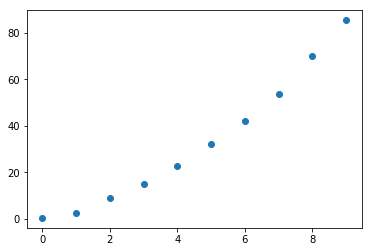

In [24]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*10, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

plt.show()
#plt.scatter(x=list((range(10, 1000, 10))), y=auc_roc_forest_results_proba)
plt.show()
#plt.scatter(x=list((range(10, 1000, 10))), y=forest_f_results)
plt.show()

print("Time taken via number of trees:")
plt.scatter(x=list(range(0, 10)), y=time_list)
plt.show()

In [86]:
decision_forest = RandomForestClassifier(random_state=3, n_estimators=580)
decision_forest_proba = RandomForestClassifier(random_state=3, n_estimators=580)

decision_forest.fit(X_train, y_train)
    
decision_forest_proba.fit(X_train, y_train)

prediction_forest = decision_forest.predict(X_test)
    
prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

test_forest_results.append(decision_forest.score(X_test, y_test))

train_forest_results.append(decision_forest.score(X_train, y_train))

accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))

print(classification_report(prediction_forest.round(), y_test))

             precision    recall  f1-score   support

        0.0       0.25      1.00      0.40         1
        1.0       0.62      0.71      0.67         7
        2.0       0.50      0.25      0.33         4
        3.0       0.00      0.00      0.00         1
        4.0       0.91      0.62      0.74        32
        5.0       0.60      0.43      0.50         7
        6.0       0.40      1.00      0.57         2
        7.0       0.25      0.50      0.33         2
        8.0       0.67      0.44      0.53         9
        9.0       0.40      1.00      0.57         2

avg / total       0.72      0.58      0.62        67



And finally, let's take a look at importances of the classes:

[0.11704612 0.01874101 0.04430606 0.00917622 0.07368359 0.16890341
 0.09671985 0.09749003 0.02644314 0.04907317 0.04161858 0.07966053
 0.17713829]


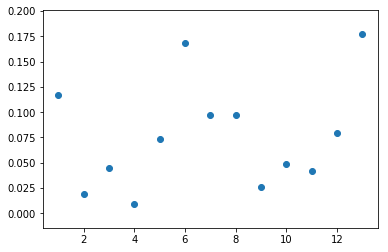

In [25]:
importances = list(decision_forest.feature_importances_)

number = list(range(1, 14))

print(decision_forest.feature_importances_)

plt.scatter(x=number, y=importances)